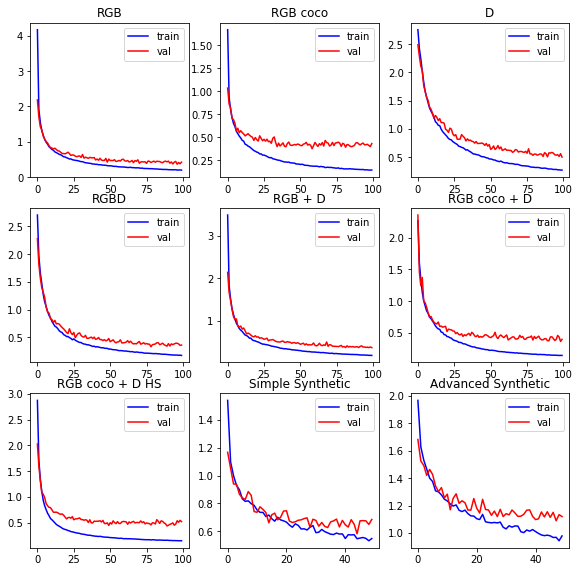

In [60]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import inspect
import tensorflow as tf

model = "depth"

synthetic = [
    ("Simple Synthetic", 'logs/sixd20180406T1527/events.out.tfevents.1523021278.sdur-2'),
    ("Advanced Synthetic", 'logs/overlay3d20180420T0727/events.out.tfevents.1524202029.sdur-2'),
]

natural = [
    ("RGB", 'logs/hinterstoisser_rgb_20180511T0924/events.out.tfevents.1526023503.sdur-2'),
    ("RGB coco", 'logs/hinterstoisser_rgb_coco20180514T1037/events.out.tfevents.1526287039.sdur-2'),
    ("D", 'logs/hinterstoisser_depth_only_20180507T1114/events.out.tfevents.1525684521.sdur-2'),
    ("RGBD", "logs/hinterstoisser_rgbd_bottom_up_jointly20180514T2233/events.out.tfevents.1526330057.sdur-2"),
    ("RGB + D", "logs/hinterstoisser_rgbd_bottom_up_separate_20180509T0827/events.out.tfevents.1525847325.sdur-2"),
    ("RGB coco + D", "logs/hinterstoisser_rgbd_coco_train_heads_depth_20180503T1059/events.out.tfevents.1525337994.sdur-2"),
    ("RGB coco + D HS", "logs/hinterstoisser_rgb_on_coco_depth_on_hinterstoisser_20180509T2329/events.out.tfevents.1525901372.sdur-2"),
]


for plotname, logs, (rows, cols), mepoch in [("loss_plots", natural + synthetic, (3, 3), [100, 100, 100, 100, 100, 100, 100, 50, 50])]:
    plt.figure(figsize=(cols * 3 + (cols-1) * .33, rows * 3 + (rows-1) * .33))
    for i, (name, log) in enumerate(logs):
        plt.subplot(rows, cols, i+1)
        loss = []
        val = []
        for e in tf.train.summary_iterator(log):
            for v in e.summary.value:
                if v.tag == 'loss':
                    loss.append(v.simple_value)
                elif v.tag == 'val_loss':
                    val.append(v.simple_value)
        loss, val = loss[:mepoch[i]], val[:mepoch[i]]
        plt.plot(loss, 'b', label="train")
        plt.plot(val, 'r', label="val")
        plt.title(name)
        plt.legend()
    #plt.subplots_adjust(0.1, 0.1, 0.9, 0.9, 0.3, 0.3)
    plt.savefig("{}.svg".format(plotname), dpi=100)